# SETTINGS


In [1]:
import torch
import torchvision
from script import *
from visualization import *
from train_and_test import *
from app_1 import *


In [2]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

# Applying APP1 and creating Train, Validation and Test DataLoaders

len train:  957
len val:  239
len test:  75


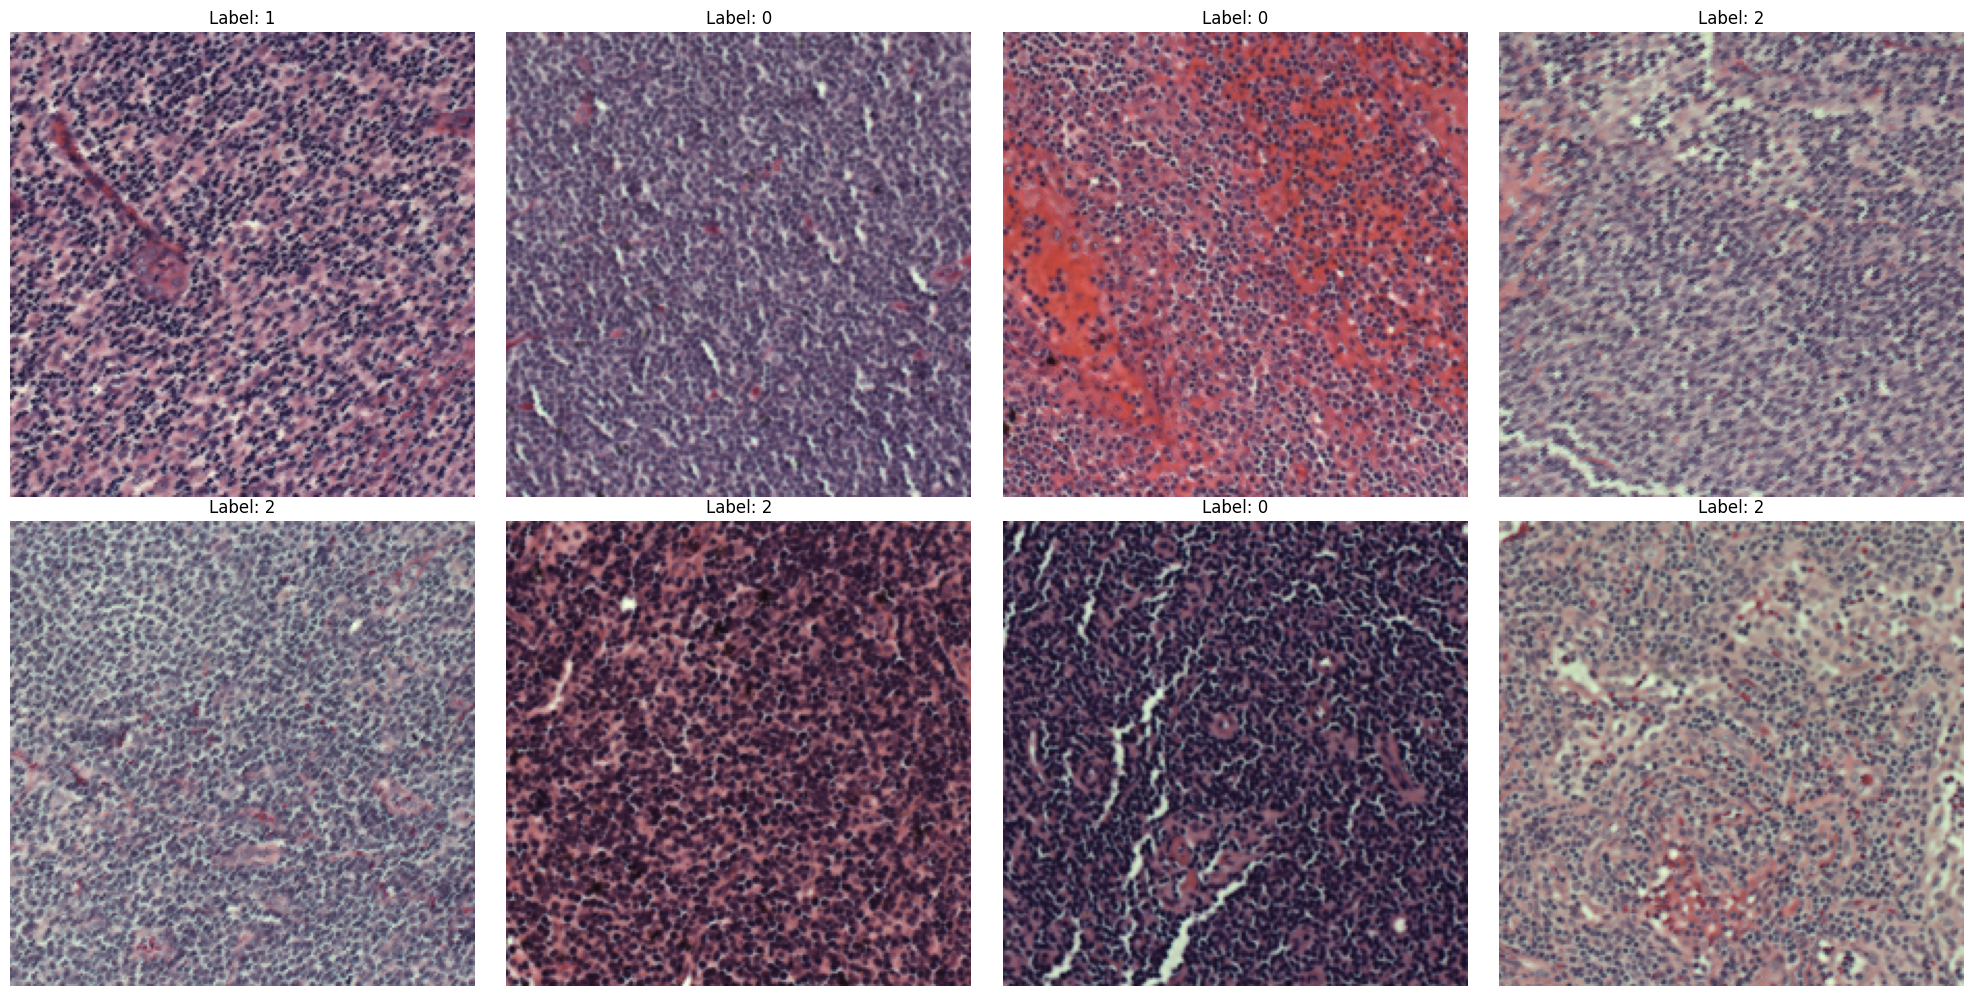

In [3]:

dm = MyDataModule(batch_size=BATCH_SIZE, transform=APP1.APP1, augment=True)
dm.setup()
train_loader = dm.train_dataloader()
test_loader = dm.test_dataloader()
val_loader = dm.val_dataloader()

app_sample_visualizer(train_loader)


# First Model: AlexNet

In [4]:
    Alexnet_model = torchvision.models.alexnet(weights='DEFAULT')
    Alexnet_model.classifier[4] = nn.Linear(4096,1024)

    Alexnet_model.classifier[6] = nn.Linear(1024,3)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:13<00:00, 17.7MB/s]   


# Train and Validation Phase

In [5]:
    tt = Train_Test(NUM_EPOCHS, Alexnet_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/Alexnet_model_app1.pth')
    tt.setup(learning_rate=0.0001)
    train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9654735200955701,--- Validation loss: 0.7782125136343505
Train Accuracy: 50.37%,--- Val Accuracy: 63.18%
--------------------------


Epoch [2/100] - Train loss: 0.7364440903519139,--- Validation loss: 0.6342967516707576
Train Accuracy: 63.74%,--- Val Accuracy: 71.13%
--------------------------


Epoch [3/100] - Train loss: 0.6204527900510447,--- Validation loss: 0.5295569749556824
Train Accuracy: 72.31%,--- Val Accuracy: 74.90%
--------------------------


Epoch [4/100] - Train loss: 0.5561502602033107,--- Validation loss: 0.5183631503432365
Train Accuracy: 74.19%,--- Val Accuracy: 78.24%
--------------------------


Epoch [5/100] - Train loss: 0.43668866353722574,--- Validation loss: 0.4102798690356969
Train Accuracy: 81.30%,--- Val Accuracy: 83.68%
--------------------------


Epoch [6/100] - Train loss: 0.37106924570217154,--- Validation loss: 0.3270641722439722
Train Accuracy: 84.64%,--- Val Accuracy: 85.77%
--------------------------


Epoch [7/100] 

# Plotting Result

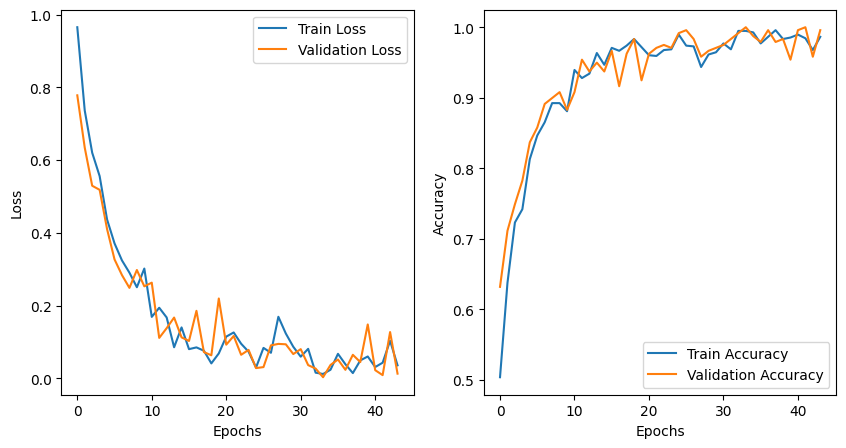

In [6]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [7]:
    tt.test()

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.96      0.89      0.92        27
           2       0.86      0.95      0.90        19

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75

Accuracy of the network on the test images: 93.33 %


# Second Model ResNet-50

In [8]:
resnet50_model = torchvision.models.resnet50(weights='DEFAULT')
resnet50_model.fc = nn.Linear(2048,3)


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 30.8MB/s]


# Train and Validation Phase

In [9]:
tt = Train_Test(NUM_EPOCHS, resnet50_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/ResNet50_model_app1.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.9550934250825625,--- Validation loss: 1.0138676525658643
Train Accuracy: 57.16%,--- Val Accuracy: 56.90%
--------------------------


Epoch [2/100] - Train loss: 0.5278128056379197,--- Validation loss: 0.3132218658674711
Train Accuracy: 82.13%,--- Val Accuracy: 89.54%
--------------------------


Epoch [3/100] - Train loss: 0.22884446049309573,--- Validation loss: 0.1525524737445879
Train Accuracy: 93.31%,--- Val Accuracy: 95.82%
--------------------------


Epoch [4/100] - Train loss: 0.1353325674946779,--- Validation loss: 0.04700468949755365
Train Accuracy: 95.51%,--- Val Accuracy: 99.16%
--------------------------


Epoch [5/100] - Train loss: 0.08402064573428474,--- Validation loss: 0.060653275545203285
Train Accuracy: 97.70%,--- Val Accuracy: 97.91%
--------------------------


Epoch [6/100] - Train loss: 0.08756936748697965,--- Validation loss: 0.023351274134599014
Train Accuracy: 97.18%,--- Val Accuracy: 99.58%
--------------------------


Epoch [7

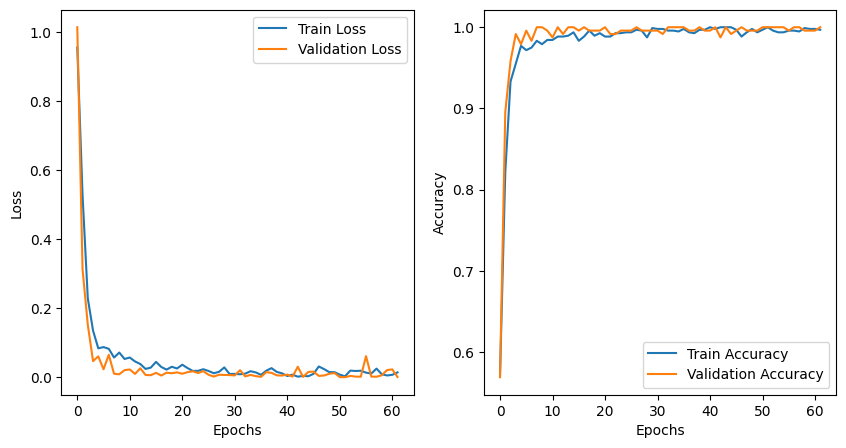

In [10]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [11]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %


# Third Model: DenseNet-121

In [12]:
densenet121_model = torchvision.models.densenet121(weights='DEFAULT')
densenet121_model.classifier = nn.Linear(1024, 3)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:01<00:00, 18.9MB/s]


# Train and Validation Phase

In [13]:
tt = Train_Test(NUM_EPOCHS, densenet121_model, train_loader, val_loader, test_loader, model_path='/kaggle/working/DenseNet121_model_app1.pth')
tt.setup(learning_rate=0.0001)
train_losses, train_accuracies, val_losses, val_accuracies = tt.train_val()


Epoch [1/100] - Train loss: 0.714896059926899,--- Validation loss: 0.7777124915162889
Train Accuracy: 69.70%,--- Val Accuracy: 63.60%
--------------------------


Epoch [2/100] - Train loss: 0.2904317462456762,--- Validation loss: 0.19534184144630592
Train Accuracy: 90.70%,--- Val Accuracy: 93.31%
--------------------------


Epoch [3/100] - Train loss: 0.14419571126547479,--- Validation loss: 0.10612508564189888
Train Accuracy: 96.13%,--- Val Accuracy: 96.65%
--------------------------


Epoch [4/100] - Train loss: 0.1372906984518065,--- Validation loss: 0.0735045865365152
Train Accuracy: 95.19%,--- Val Accuracy: 98.33%
--------------------------


Epoch [5/100] - Train loss: 0.08042001624590675,--- Validation loss: 0.02906443155273234
Train Accuracy: 97.81%,--- Val Accuracy: 99.58%
--------------------------


Epoch [6/100] - Train loss: 0.04592390590840746,--- Validation loss: 0.02981803369821365
Train Accuracy: 98.96%,--- Val Accuracy: 99.16%
--------------------------


Epoch [7/1

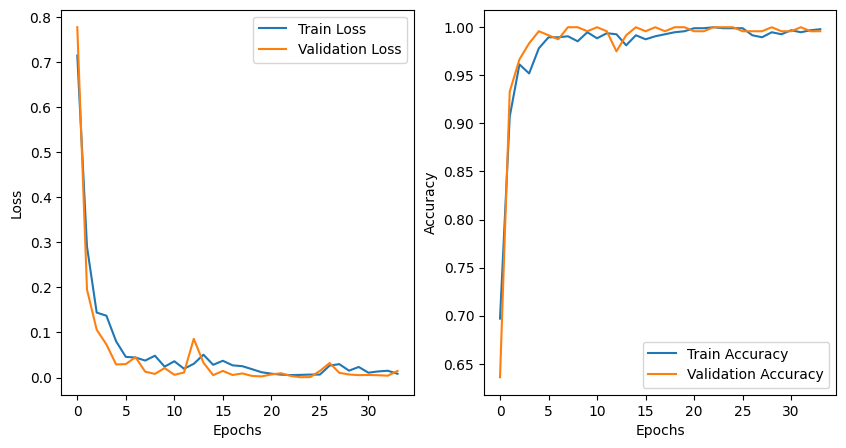

In [14]:
results_visualizer(train_losses, train_accuracies, val_losses, val_accuracies)

# Test Phase

In [15]:
tt.test()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      0.96      0.98        27
           2       0.95      1.00      0.97        19

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Accuracy of the network on the test images: 98.67 %
